<a href="https://colab.research.google.com/github/kpatwa153/gis/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#! pip install geopandas
!pip install mapclassify
import geopandas as gpd
import mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 940.5 kB/s eta 0:00:00


## mapping your area of interest

Link to download the file: https://data-lakecountyil.opendata.arcgis.com/datasets/lakecountyil::national-obesity-by-state.zip?outSR=%7B%22latestWkid%22%3A3435%2C%22wkid%22%3A102671%7D

PS0

In [ ]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O us_map.zip https://drive.google.com/uc?id=1hFpTOmjP-Ti7JAEZfD0V3mRtF5siqS5Q&export=download

zip_ref = zipfile.ZipFile('us_map.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping


In [ ]:
njC=gpd.read_file('National_Obesity_By_State.shp') #load the shapefile with gpd as njC

<Axes: >

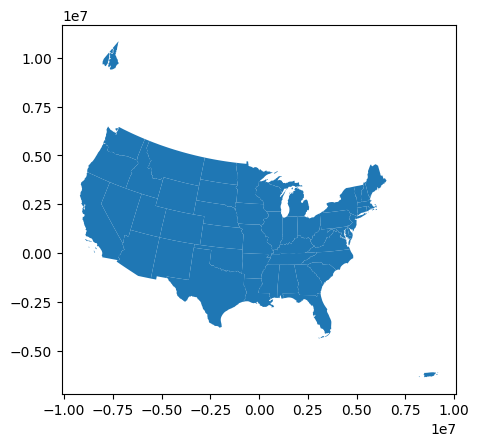

In [ ]:
#make the map
njC.plot()

In [ ]:
njC.dtypes

FID              int64
NAME            object
Obesity        float64
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

In [ ]:
df = njC[['NAME','Obesity','SHAPE_Leng']]
df.head(2)

,NAME,Obesity,SHAPE_Leng
0,Texas,32.4,1.540832e+07
1,California,24.2,1.451870e+07


<Axes: >

[]

[]

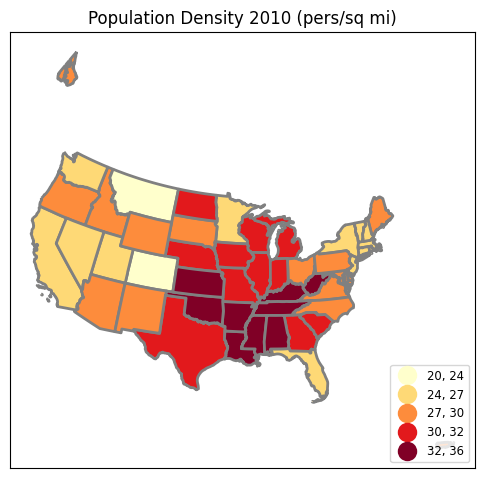

In [ ]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='Obesity',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as